# importing some important libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


# load the csv file survey of the mentalt health of the student 

In [5]:
data= pd.read_csv('/kaggle/input/student-mental-health/Student Mental health.csv')
data.head(5)


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [6]:
data.isnull()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,False


# data cleaning and preprocessing

In [7]:
data.isnull().count

<bound method DataFrame.count of      Timestamp  Choose your gender    Age  What is your course?  \
0        False               False  False                 False   
1        False               False  False                 False   
2        False               False  False                 False   
3        False               False  False                 False   
4        False               False  False                 False   
..         ...                 ...    ...                   ...   
96       False               False  False                 False   
97       False               False  False                 False   
98       False               False  False                 False   
99       False               False  False                 False   
100      False               False  False                 False   

     Your current year of Study  What is your CGPA?  Marital status  \
0                         False               False           False   
1                   

In [8]:
data.isnull().sum() #age has one null value

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [9]:
# now here i fill that value as 0 
data['Age']=data['Age'].fillna(data['Age'].mean())

In [10]:
data['Age'].isnull().sum()

0

In [11]:
data.notnull().count()

Timestamp                                       101
Choose your gender                              101
Age                                             101
What is your course?                            101
Your current year of Study                      101
What is your CGPA?                              101
Marital status                                  101
Do you have Depression?                         101
Do you have Anxiety?                            101
Do you have Panic attack?                       101
Did you seek any specialist for a treatment?    101
dtype: int64

In [12]:
data.notnull().count

<bound method DataFrame.count of      Timestamp  Choose your gender   Age  What is your course?  \
0         True                True  True                  True   
1         True                True  True                  True   
2         True                True  True                  True   
3         True                True  True                  True   
4         True                True  True                  True   
..         ...                 ...   ...                   ...   
96        True                True  True                  True   
97        True                True  True                  True   
98        True                True  True                  True   
99        True                True  True                  True   
100       True                True  True                  True   

     Your current year of Study  What is your CGPA?  Marital status  \
0                          True                True            True   
1                          True 

In [13]:
data.shape # rows = 101 , col=11

(101, 11)

In [14]:
data.dtypes # 1 - float , 10 - object

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [15]:
data.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [16]:
# now here i am changing the columns names because these name is very big

data.columns = ['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
data.columns

Index(['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

In [17]:
data.head(10)

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [18]:
# as you in dataset year columns has year1 ,so i remove the year from year columns 
data['Year'] = data['Year'].apply(lambda x : int(x.split(' ')[-1]))
data['Year'].unique()

array([1, 2, 3, 4])

In [19]:
data.head(5)

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


In [20]:
data['CGPA'].unique() #  '3.50 - 4.00', '3.50 - 4.00 ' are same . We have to remove the trailling spaces

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [21]:
data['CGPA'] = data['CGPA'].apply(lambda x : x.strip())
data['CGPA'].unique() 

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [22]:
# To see the no of courses students are enrolled in

Course_List = data['Course'].unique().tolist()
print("no of courses enrolled in dataset=",len(Course_List))  



no of courses enrolled in dataset= 49


In [23]:
data['Course'].unique() # There are multiple courses with the same name. 


array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [24]:
course_dic = {'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 
              'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 
              'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'}

data['Course'].replace(course_dic,inplace=True)

In [25]:
print("unique courses are =",len(data['Course'].unique().tolist())) # So in actual there are 37 unique courses 

unique courses are = 37


In [26]:
data.sample(5)

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
98,13/07/2020 21:22:56,Female,19.0,Nursing,3,3.50 - 4.00,Yes,Yes,No,Yes,No
20,8/7/2020 13:12,Female,19.0,Engineering,1,3.00 - 3.49,No,No,No,Yes,No
61,8/7/2020 16:53,Female,19.0,BCS,1,3.50 - 4.00,No,No,No,No,No
45,8/7/2020 15:09,Male,18.0,BCS,1,3.50 - 4.00,No,No,Yes,Yes,No
38,8/7/2020 14:47,Female,18.0,Irkhs,1,3.50 - 4.00,No,No,No,No,No


In [27]:
data['Course'].value_counts() # No of students enrolled in each course

Course
Engineering                20
BCS                        18
IT                         11
Biomedical science          4
KOE                         4
Law                         3
BENL                        3
Irkhs                       3
Psychology                  3
Pendidikan Islam            2
Fiqh                        2
Koe                         2
Islamic Education           2
Human Sciences              1
Malcom                      1
Kop                         1
Diploma Nursing             1
Biotechnology               1
Communication               1
Econs                       1
Pendidikan Islam            1
Radiography                 1
DIPLOMA TESL                1
MHSC                        1
TAASL                       1
CTS                         1
ALA                         1
Usuluddin                   1
Business Administration     1
Banking Studies             1
Marine science              1
ENM                         1
Accounting                  1
KEN

In [28]:
data.columns

Index(['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

# here i make function to count student , who select the most frequent courses

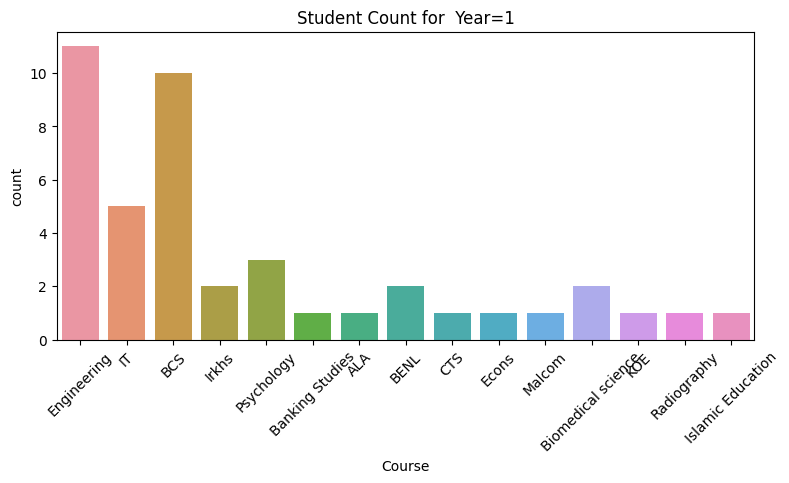

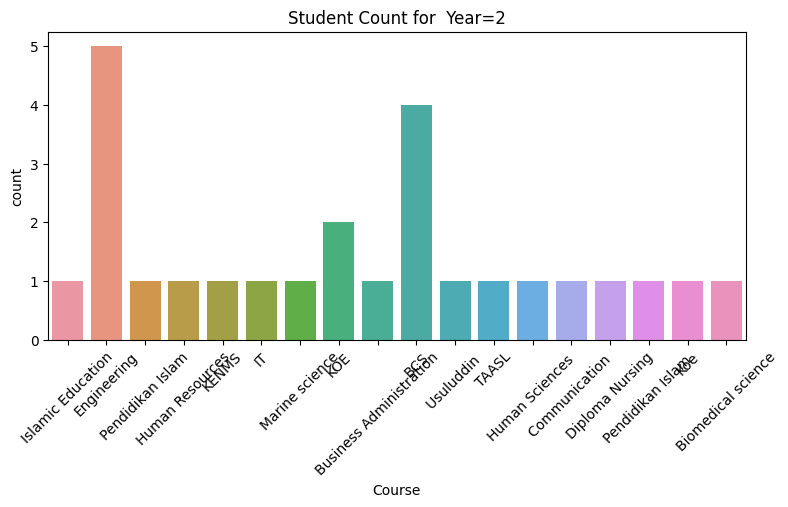

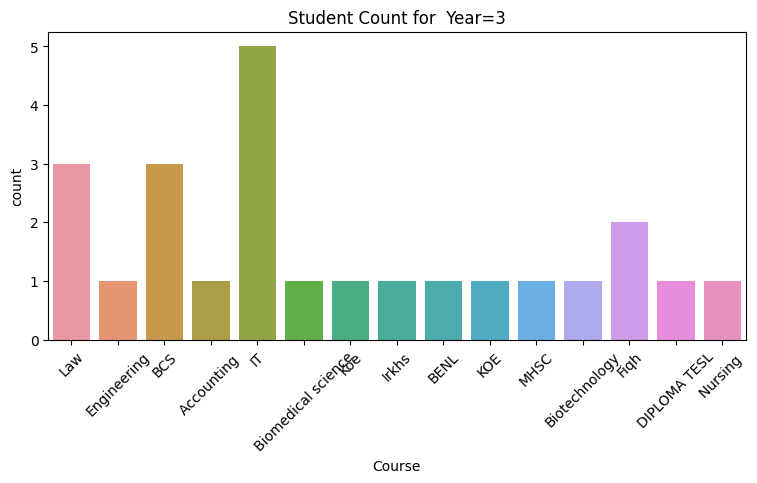

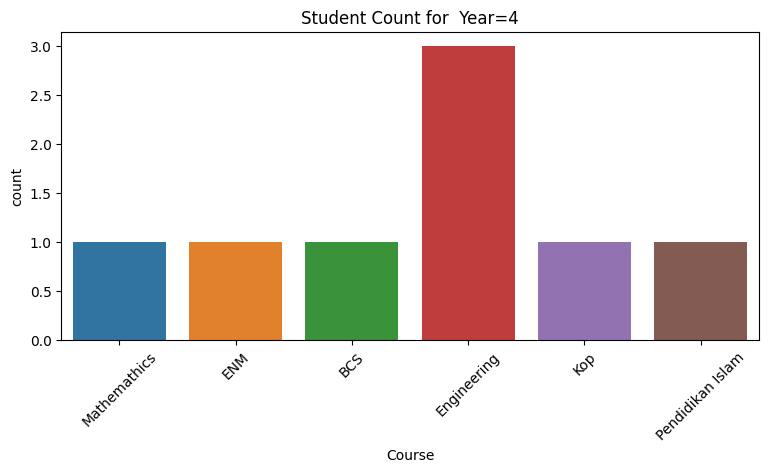

In [29]:
def plot_student_cnt(dataframe):
    for yr in dataframe['Year'].unique().tolist():
        plt.figure(figsize=(9, 4))
        pl_1 = sns.countplot(x='Course',data=dataframe[dataframe['Year']==yr])
        pl_1.set_xticklabels(pl_1.get_xticklabels(), rotation=45)
        pl_1.set_title(f'Student Count for  Year={yr}')
        
plot_student_cnt(data)

From the avove Plots
Engineering students from 1,2,4 years have appeared in maximum no in surveys except in year = 3

Apart from Engineering BCS students have also appered in surveys in huge no except in year = 4

Engineering , BCS, IT had responded in the srvey in max no . This also indicates that these students must be sufering from some kind of meltal health issue hence had taken the survey.

The missing courses in year = 4 must be due to the fact that these courses have 3 year duration

# Anxiety 

In [30]:
data['Anxiety'].value_counts() # Out of 101 students 34 are suffering from anxiety

Anxiety
No     67
Yes    34
Name: count, dtype: int64

Text(0.5, 1.0, 'Course vs Anxiety')

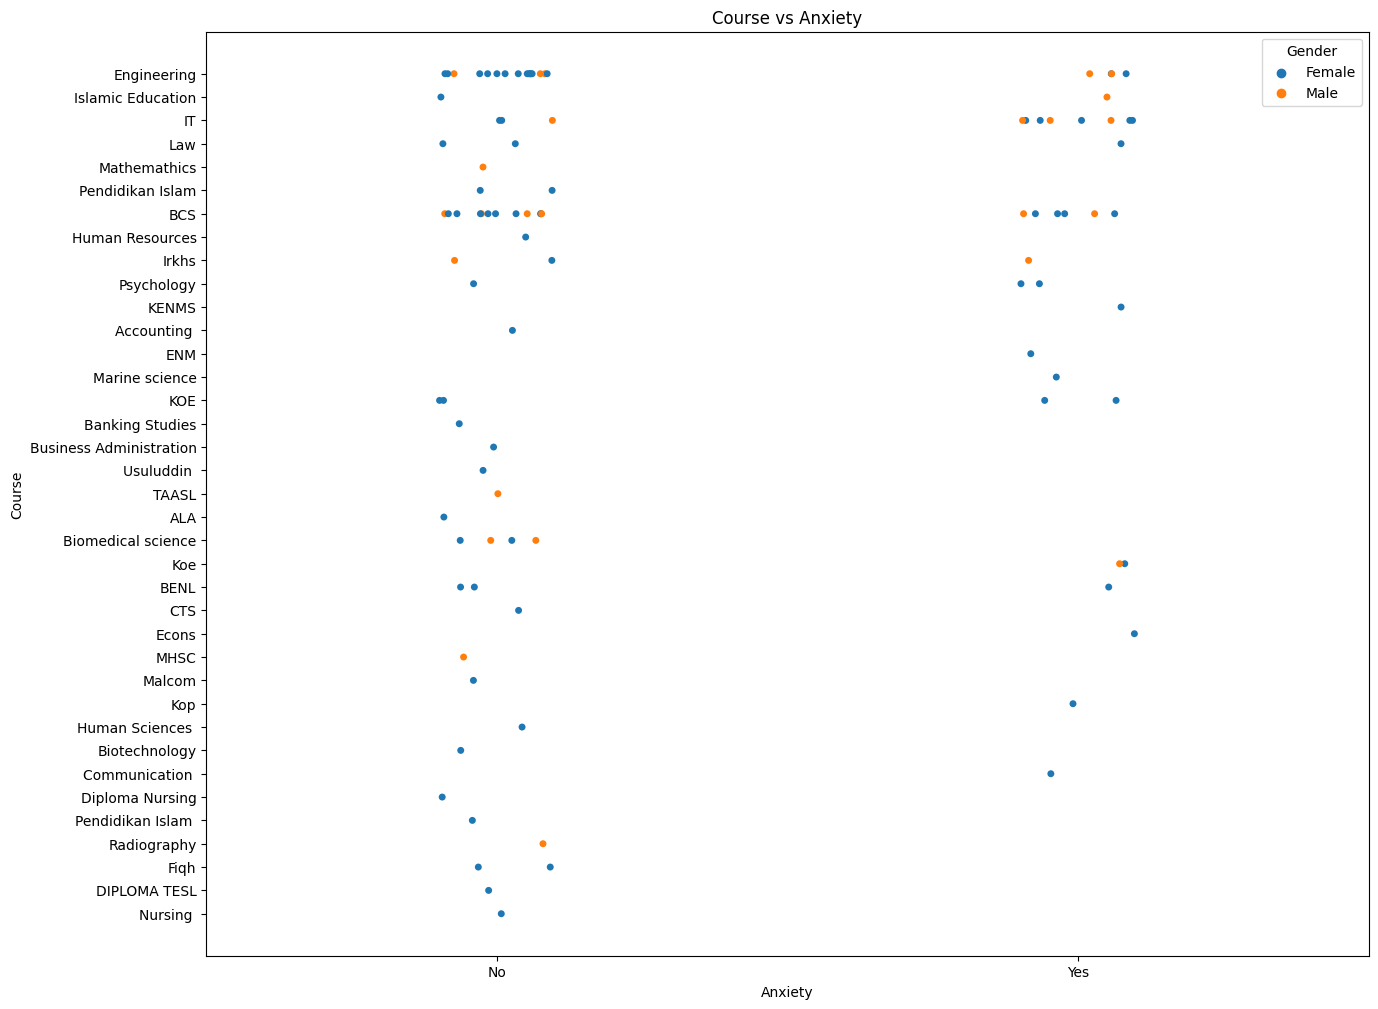

In [31]:
plt.figure(figsize=(15,12))
plot_1 = sns.stripplot(x='Anxiety',y='Course',data=data,hue='Gender')
plot_1.set_title("Course vs Anxiety")

In [32]:
print(" No Anxiety \n")
print(data[data['Anxiety']=='No']['Course'].value_counts().nlargest(5))
print("\n Yes Anxiety \n")
print(data[data['Anxiety']=='Yes']['Course'].value_counts().nlargest(5))

 No Anxiety 

Course
Engineering           16
BCS                   12
Biomedical science     4
IT                     3
BENL                   2
Name: count, dtype: int64

 Yes Anxiety 

Course
IT             8
BCS            6
Engineering    4
Koe            2
KOE            2
Name: count, dtype: int64


_From the plot of Course Vs Anxiety__

IT students suffers from max anxiety

BCS , Engineering students are the next 2 who suffers from max anxiety

In [33]:
data[['Anxiety','Gender']].groupby('Gender')['Anxiety'].value_counts()

Gender  Anxiety
Female  No         51
        Yes        24
Male    No         16
        Yes        10
Name: count, dtype: int64

# Much more no of Female students suffer from anxiety than Male students

In [34]:
# To find the courses enrolled in where students faces no anxiety

Anx = data[data['Anxiety']=='Yes']['Course'].unique().tolist()
No_Anx = data[data['Anxiety']=='No']['Course'].unique().tolist()


set1 = set(No_Anx)
set2 = set(Anx)

print(list(sorted(set1 - set2))) 


['ALA', 'Accounting ', 'Banking Studies', 'Biomedical science', 'Biotechnology', 'Business Administration', 'CTS', 'DIPLOMA TESL', 'Diploma Nursing', 'Fiqh', 'Human Resources', 'Human Sciences ', 'MHSC', 'Malcom', 'Mathemathics', 'Nursing ', 'Pendidikan Islam', 'Pendidikan Islam ', 'Radiography', 'TAASL', 'Usuluddin ']


# Depression

In [35]:
data['Depression'].value_counts()

Depression
No     66
Yes    35
Name: count, dtype: int64

Text(0.5, 1.0, 'Course vs Depression')

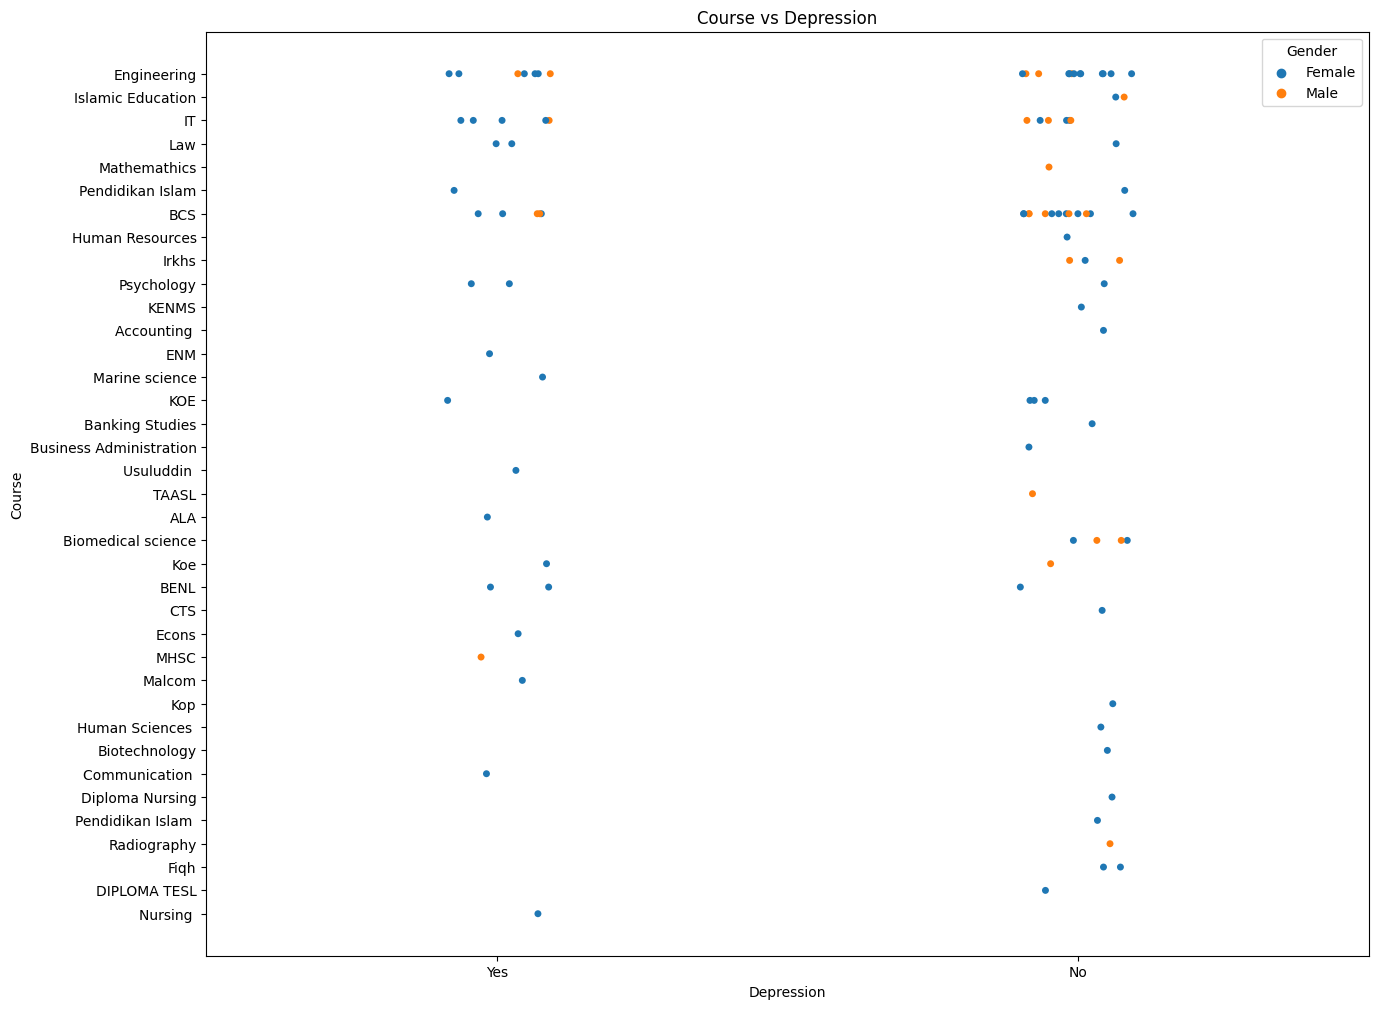

In [36]:
plt.figure(figsize=(15,12))
plot_2 = sns.stripplot(x='Depression',y='Course',data=data,hue='Gender')
plot_2.set_title("Course vs Depression")

In [37]:
print('Depression')
print(data[data['Depression']=='Yes']['Course'].value_counts().nlargest(5))

Depression
Course
Engineering    7
BCS            5
IT             5
Law            2
Psychology     2
Name: count, dtype: int64


Engineering stuedents ranks the top in depression . BCS , IT follwing after it

In [38]:
data.columns

Index(['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

In [39]:
data[['Gender','Depression']].value_counts()

Gender  Depression
Female  No            46
        Yes           29
Male    No            20
        Yes            6
Name: count, dtype: int64

Result showed Females suffer mostly from depression than males

# Panic Attacks

Text(0.5, 1.0, 'Course vs Panic_Attack')

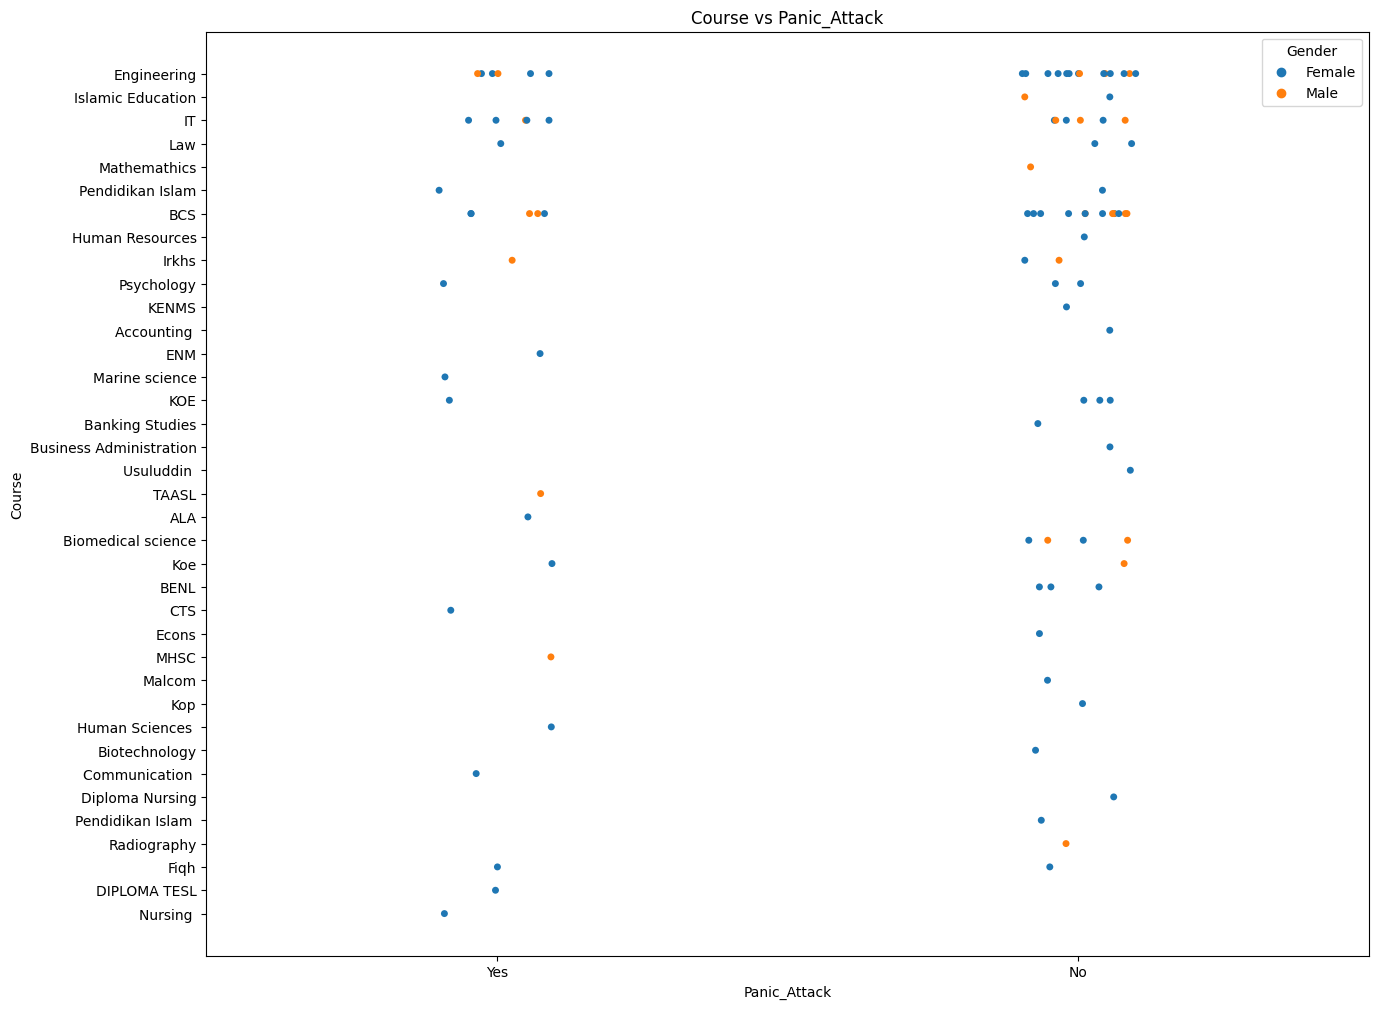

In [40]:
plt.figure(figsize=(15,12))
plot_2 = sns.stripplot(x='Panic_Attack',y='Course',data=data,hue='Gender')
plot_2.set_title("Course vs Panic_Attack")

In [41]:
data[data['Panic_Attack']=='Yes']['Course'].value_counts().nlargest(5)




Course
Engineering    6
BCS            5
IT             5
MHSC           1
Fiqh           1
Name: count, dtype: int64

Engineering students suffer mostly from panic attacks

In [42]:
data[['Gender','Panic_Attack']].value_counts()

Gender  Panic_Attack
Female  No              50
        Yes             25
Male    No              18
        Yes              8
Name: count, dtype: int64

In [43]:
def problem(dataframe):
    list = ['Depression','Anxiety','Panic_Attack']
    for i in list:
        print(data[['Year',i]].groupby('Year')[i].value_counts())
        print('\n')
    
problem(data)

Year  Depression
1     No            29
      Yes           14
2     No            16
      Yes           10
3     No            14
      Yes           10
4     No             7
      Yes            1
Name: count, dtype: int64


Year  Anxiety
1     No         29
      Yes        14
2     No         16
      Yes        10
3     No         16
      Yes         8
4     No          6
      Yes         2
Name: count, dtype: int64


Year  Panic_Attack
1     No              29
      Yes             14
2     No              18
      Yes              8
3     No              14
      Yes             10
4     No               7
      Yes              1
Name: count, dtype: int64




So mostly students in first year suffer from Mental Health.It is found that all the students in first year who had taken the survey suffers from  Anxiety , Depression , Panic Attacks

Final Year (year = 4) students are least prone to Anxiety , Depression ,Panic Attacks .

Depression ,Panic Attacks decreases from year = 1 to year = 4 but data shows that anxiety remains the same in the students of year = 2,3

<Axes: xlabel='Age', ylabel='count'>

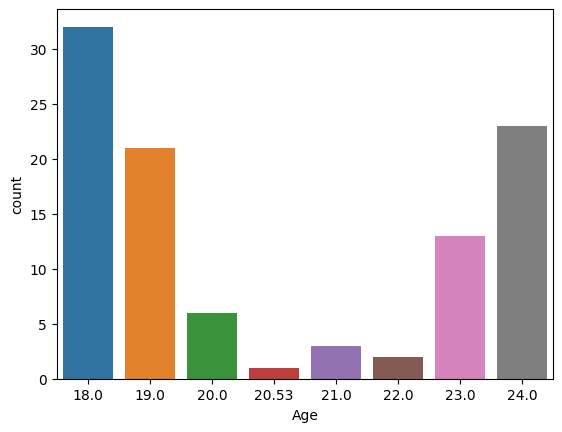

In [44]:
sns.countplot(x='Age',data=data) 

Students of Age = 18,19,24 responded in the survey 


We have to remove the age (20.53) since age cant be fractional

In [45]:
data["Age"].value_counts() # 20.53 age has 1 record which is to be removed 

Age
18.00    32
24.00    23
19.00    21
23.00    13
20.00     6
21.00     3
22.00     2
20.53     1
Name: count, dtype: int64

In [46]:
row_idx = data[data['Age']==20.53].index


In [47]:
data.iloc[row_idx] # This row have 20.53 age

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
43,8/7/2020 15:07,Male,20.53,IT,1,0 - 1.99,No,No,No,No,No


(100, 11)


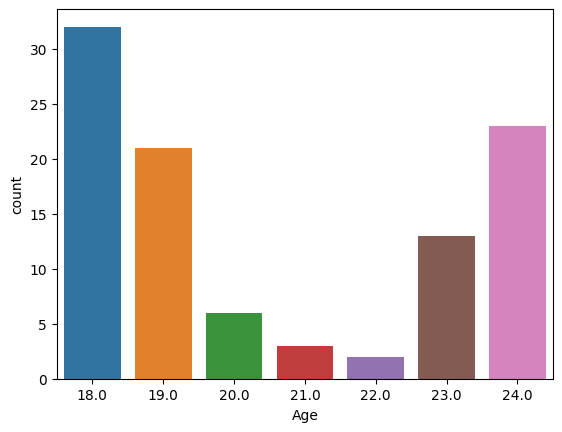

In [48]:
data_1 = data.drop(row_idx)

sns.countplot(x='Age',data=data_1)

print(data_1.shape)  # Removed the fractional age

In [49]:
data.iloc[row_idx] 

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
43,8/7/2020 15:07,Male,20.53,IT,1,0 - 1.99,No,No,No,No,No


In [50]:
from scipy.stats import shapiro
print(data[['Age','Year']].skew())

print("For age :", shapiro(data[['Age']]))
    
print("For Year :", shapiro(data[['Year']]))


Age     0.378999
Year    0.558130
dtype: float64
For age : ShapiroResult(statistic=0.7903946042060852, pvalue=1.1008657180289205e-10)
For Year : ShapiroResult(statistic=0.8191123008728027, pvalue=8.747252366880787e-10)


Since p val < 0.05 hence data is not normally distributed . The Age and Year are moderately positively skewed since 0.5 < skewness < 1

<Axes: xlabel='Age', ylabel='Density'>

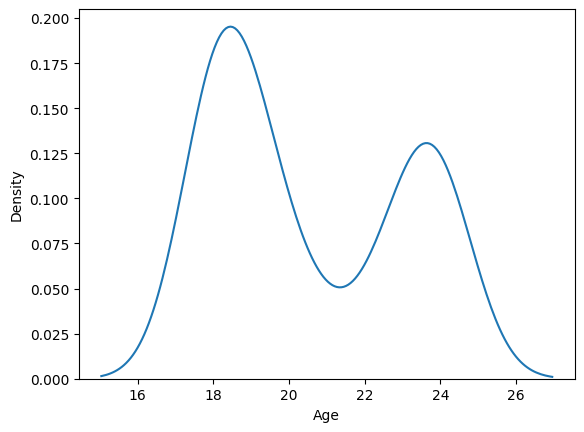

In [51]:
sns.kdeplot(data['Age']) # Non Normal Distribution

<Axes: xlabel='Year', ylabel='Density'>

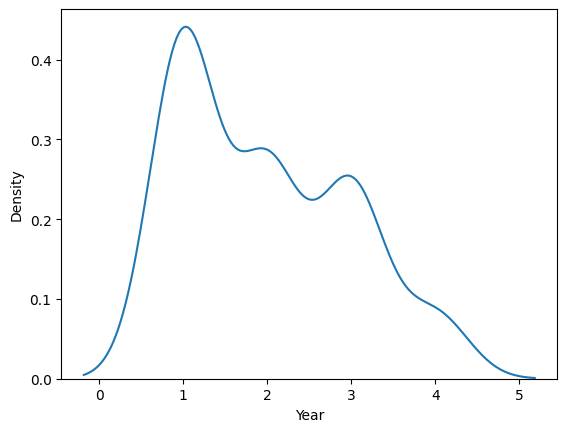

In [52]:
sns.kdeplot(data['Year']) # Non Normal Distribution  

In [53]:
data.columns

Index(['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

Effect of CGPA on Mental Health

Text(0.5, 1.0, 'Count of CGPA by Depression')

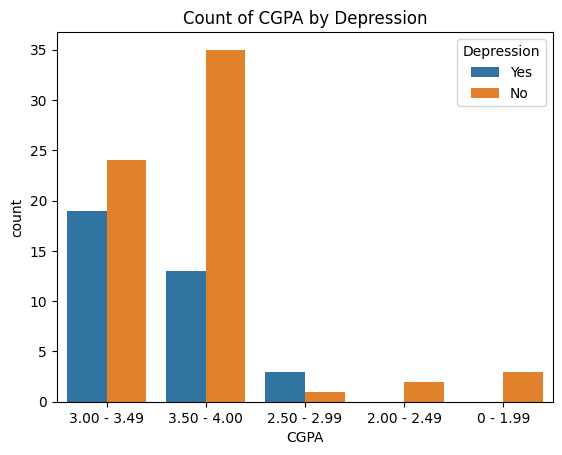

In [54]:
plot_2 = sns.countplot(x='CGPA',data=data_1,hue='Depression')
plot_2.set_title('Count of CGPA by Depression')


Students securing highest CGPA = 3 to 3.19 suffers from max Depression while students securing CGPA = 2 to 2.49 , 0 to 1.99 have no depression

Most of the students securing high CGPA doen't suffer from depression

Within CGPA = 2.5 to 2.99 most of the students suffers from depression

<Axes: xlabel='CGPA', ylabel='count'>

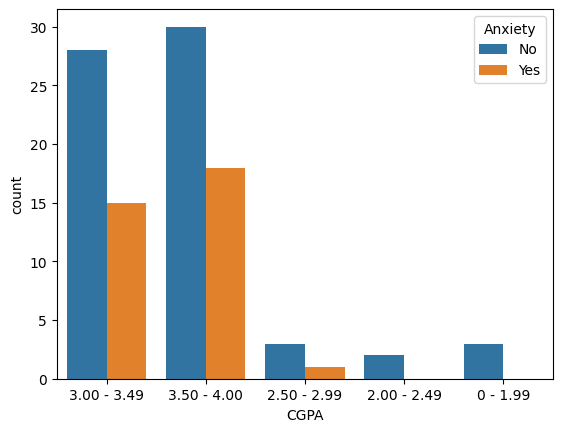

In [55]:
sns.countplot(x='CGPA',data=data_1,hue='Anxiety')

Almost equal no of students suffers from Anxiety having CGPA = 3 to 3.49 and 3.5 to 

Students securing CGPA = 2 to 2.49 , 0 to 1.99 have no Anxiety



<Axes: xlabel='CGPA', ylabel='count'>

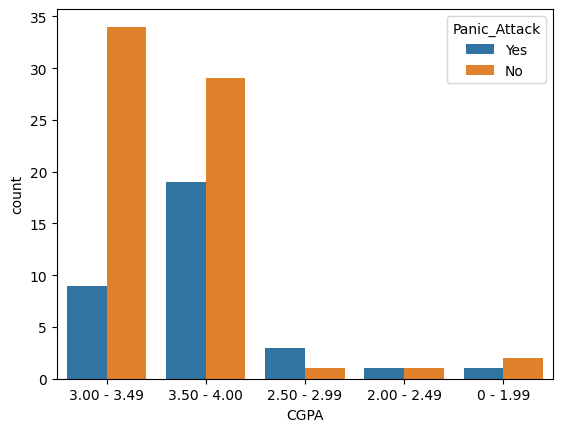

In [56]:
sns.countplot(x='CGPA',data=data_1,hue='Panic_Attack')

Every student irrespeective of CGPA suffers from panic attack 

Students having CGPA = 2.5 to 2.99 suffers mostly from Panic Attacks 

Effect of Age on CGPA

<Axes: xlabel='Year', ylabel='count'>

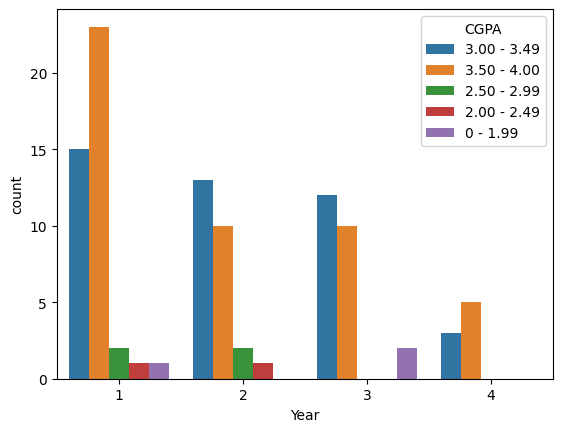

In [57]:
sns.countplot(x='Year',data=data_1,hue='CGPA')


Most of the First year students secures the highest CGPA 

Students securing the highest CGPA in 2nd and 3rd year are equal

None of the students in final year had scored CGPA within 2 to 2.99

Students in year = 1,2 perform academically much better than the 3rd and 4th year students

<Axes: xlabel='Year', ylabel='count'>

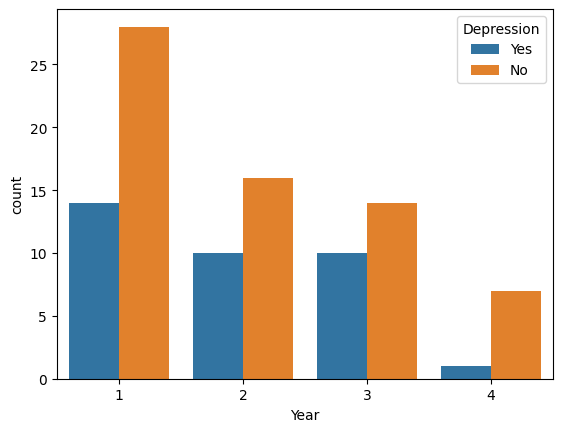

In [58]:
sns.countplot(x='Year',data=data_1,hue='Depression')


<Axes: xlabel='Year', ylabel='count'>

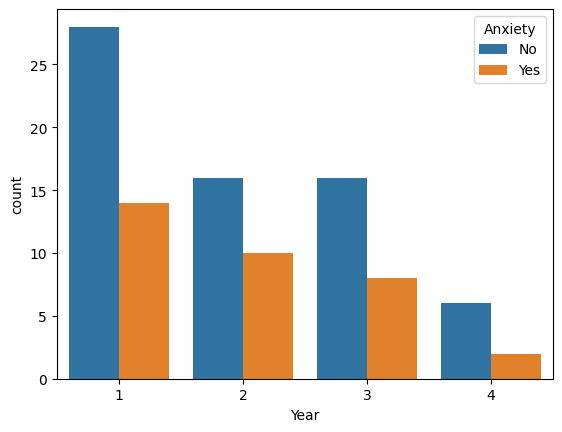

In [59]:
sns.countplot(x='Year',data=data_1,hue='Anxiety')


<Axes: xlabel='Year', ylabel='count'>

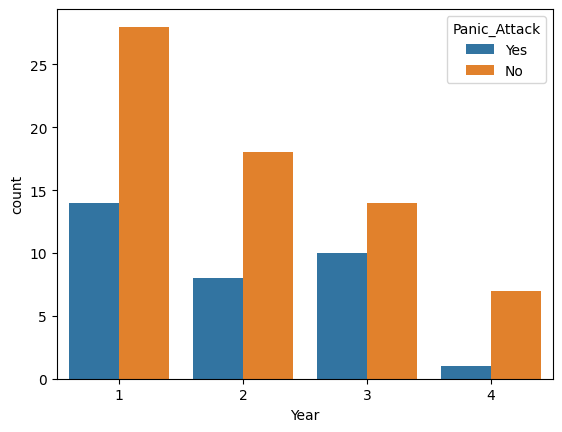

In [60]:
sns.countplot(x='Year',data=data_1,hue='Panic_Attack')

Despite of high CGPA the first year students suffers from Depression and Panic Attacks . 

The mental health of students improves gradually towards final year . It may due to the fact that the students had got accustomed to the college structure , education system and the mindset of examiners

In [61]:
data_2 = data_1.drop('Date_Time',axis=1) # Date_Time only shows the time at which the survey was being taken 

In [62]:
from sklearn import preprocessing

enc = preprocessing.LabelEncoder() 

cat_features = data_2.select_dtypes(include=['object']).columns.tolist()

for feature in cat_features:
    data_2[feature] = enc.fit_transform(data_2[feature])
    # df_2[feature] = df_2[[feature]].astype('int64') # To convert to int64 datatype


In [63]:
data_2.dtypes

Gender              int64
Age               float64
Course              int64
Year                int64
CGPA                int64
Marital_Status      int64
Depression          int64
Anxiety             int64
Panic_Attack        int64
Treatment           int64
dtype: object

In [64]:
data_2 # Encoded the categorial feature labels

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,0,18.0,14,1,3,0,1,0,1,0
1,1,21.0,20,2,3,0,0,1,0,0
2,1,19.0,18,1,3,0,1,1,1,0
3,0,22.0,25,3,3,1,1,0,0,0
4,1,23.0,29,4,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
96,0,21.0,2,1,4,0,0,1,0,0
97,1,18.0,14,2,3,0,1,1,0,0
98,0,19.0,30,3,4,1,1,0,1,0
99,0,23.0,31,4,4,0,0,0,0,0


<Axes: >

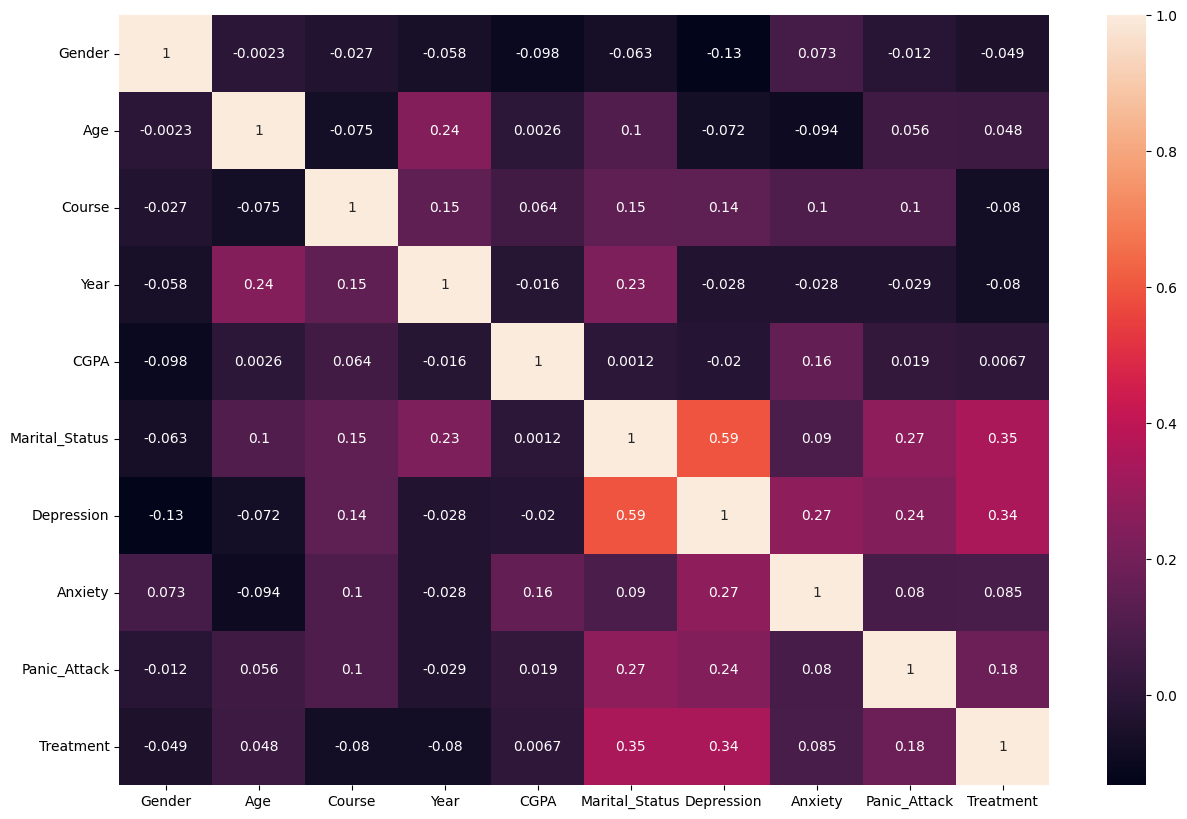

In [65]:
plt.figure(figsize=(15,10))
cor_mat = data_2.corr(method='pearson')
sns.heatmap(cor_mat,annot=True)

Shows that the marital status and depression are highly corellated

In [71]:
pip install pandas==1.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 21.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pandas: filename=pandas-1.2.0-cp310-cp310-linux_x86_64.whl size=10031190 sha256=0d187fa0dcfa1e74432684a617cb61951546fb0ba01170a24f09946631778457
  Stored in directory: /root/.cache/pip/wheels/e9/df/f4/830052fb87b9fb4610ce49085810a48dd0bf42b4aac9fd8ba1
Successfully built pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 

In [69]:
pip install --upgrade ppscore

Note: you may need to restart the kernel to use updated packages.


In [74]:
def func(dataframe):
    dep = ['Anxiety','Depression','Panic_Attack']
    for d in dep:
        print(f'\n---------{d}--------')
        print(dataframe[['Marital_Status',d]].groupby(d)['Marital_Status'].value_counts())
        print('\n')
        
func(data_1)


---------Anxiety--------
Anxiety  Marital_Status
No       No                57
         Yes                9
Yes      No                27
         Yes                7
Name: count, dtype: int64



---------Depression--------
Depression  Marital_Status
No          No                65
Yes         No                19
            Yes               16
Name: count, dtype: int64



---------Panic_Attack--------
Panic_Attack  Marital_Status
No            No                61
              Yes                6
Yes           No                23
              Yes               10
Name: count, dtype: int64




For Anxiety : 7 out of 16 married students have anxiety

For Depression : 16 out of 16 married students have depression

Forr Panic Attack : 10 out of 16 married students have Panic attacks


Conclusion : Married students mostly have poor mental health

In [75]:
data_1

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,IT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,4,3.50 - 4.00,No,No,No,No,No


In [76]:
data_final = data_1.drop('Date_Time',axis=1)
data_final.head(1)

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No


In [77]:
data_final[data_final['Age']==20.53].index # df_final doesn't have the fractional age

Index([], dtype='int64')

Mental Health is becomming a common issue among youngs in India including professionals and students. People find it 
shy to speak and come forward with this ever rising issue in our society which can be detrimental for our economy . Most of the people find it normal to have anxiety and panic attacks hence they neglect undergoing treatment or consult doctors.In many cases people didn't realize even that they are suffering from mental health problems.

Here we are trying to predict the mentality of citizens(may be due to their negligence or went unrecognised) as whether people had seek any specialist for a treatment or not even after suffering from depression , anxiety , panic attacks 

# Trainning Model

In [78]:
data_2.sample(5)

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
99,0,23.0,31,4,4,0,0,0,0,0
64,0,24.0,14,1,4,0,0,0,0,0
77,0,18.0,17,2,3,0,0,0,1,0
79,0,18.0,14,4,4,0,0,0,0,0
84,1,23.0,34,1,3,0,0,0,0,0


In [79]:
data_2.tail(10)

,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
91,1,18.0,23,2,3,0,0,1,0,0
92,0,19.0,22,2,3,1,1,0,0,0
93,0,18.0,3,1,3,0,1,0,0,0
94,0,24.0,15,3,0,0,0,0,1,0
95,0,18.0,20,1,4,0,0,0,0,0
96,0,21.0,2,1,4,0,0,1,0,0
97,1,18.0,14,2,3,0,1,1,0,0
98,0,19.0,30,3,4,1,1,0,1,0
99,0,23.0,31,4,4,0,0,0,0,0
100,1,20.0,5,2,3,0,0,0,0,0


In [103]:
data_2_f = data_2.drop('CGPA',axis=1) # Since CGPA have least or no effect on Treatment seen from PPS and Pearson matrix
data_2_f.columns


Index(['Gender', 'Age', 'Course', 'Year', 'Marital_Status', 'Depression',
       'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')

In [104]:
x = data_2_f.drop('Treatment',axis=1)
y = data_2_f['Treatment']
x

,Gender,Age,Course,Year,Marital_Status,Depression,Anxiety,Panic_Attack
0,0,18.0,14,1,0,1,0,1
1,1,21.0,20,2,0,0,1,0
2,1,19.0,18,1,0,1,1,1
3,0,22.0,25,3,1,1,0,0
4,1,23.0,29,4,0,0,0,0
...,...,...,...,...,...,...,...,...
96,0,21.0,2,1,0,0,1,0
97,1,18.0,14,2,0,1,1,0
98,0,19.0,30,3,1,1,0,1
99,0,23.0,31,4,0,0,0,0


In [105]:
# data_2_f.to_excel('Encoded_excel.xlsx')

In [106]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x,y)

feat_importances = pd.Series(model.feature_importances_,index=x.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()

In [107]:
x

,Gender,Age,Course,Year,Marital_Status,Depression,Anxiety,Panic_Attack
0,0,18.0,14,1,0,1,0,1
1,1,21.0,20,2,0,0,1,0
2,1,19.0,18,1,0,1,1,1
3,0,22.0,25,3,1,1,0,0
4,1,23.0,29,4,0,0,0,0
...,...,...,...,...,...,...,...,...
96,0,21.0,2,1,0,0,1,0
97,1,18.0,14,2,0,1,1,0
98,0,19.0,30,3,1,1,0,1
99,0,23.0,31,4,0,0,0,0


In [108]:
y

0      0
1      0
2      0
3      0
4      0
      ..
96     0
97     0
98     0
99     0
100    0
Name: Treatment, Length: 100, dtype: int64

__Using ADAboost Algorithm__

In [109]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [110]:
X_train

,Gender,Age,Course,Year,Marital_Status,Depression,Anxiety,Panic_Attack
37,0,19.0,18,1,0,1,1,1
52,0,19.0,5,3,0,0,0,0
35,0,18.0,14,1,0,0,0,0
66,0,18.0,22,3,0,0,1,0
31,1,18.0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...
28,0,24.0,18,3,1,1,1,1
96,0,21.0,2,1,0,0,1,0
15,1,24.0,2,3,0,0,0,0
91,1,18.0,23,2,0,0,1,0


In [111]:
Y_train

37     0
52     0
35     0
66     0
31     0
      ..
28     1
96     0
15     0
91     0
100    0
Name: Treatment, Length: 80, dtype: int64

In [112]:
from collections import Counter


In [113]:
!pip install imbalanced-learn


In [114]:
from imblearn.over_sampling import RandomOverSampler


In [115]:
os=RandomOverSampler(random_state=42)
X_train_os,Y_train_os=os.fit_resample(X_train,Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_os)))

The number of classes before fit Counter({0: 75, 1: 5})
The number of classes after fit Counter({0: 75, 1: 75})


In [116]:
from sklearn.metrics import classification_report


In [117]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm



# ada_ovr = AdaBoostClassifier(n_estimators=300,learning_rate=0.25)

ada_ovr =svm.SVC()

ada_ovr.fit(X_train,Y_train)

y_pred_ovr = ada_ovr.predict(X_test)
print(classification_report(Y_test,y_pred_ovr))  

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


So we could find that f1 score is pretty good : 0.97 for 0 label and 0.67 for 1 label

So the model is much more accurate in predicting 0 (No) than 1 (Yes)

Randomsampler only generate random duplicate records of the minor category in target variable. So uniqueness of minor data class remains the same as the original.

Hence f1 (0) > f1 (1)
